In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning and EDA:

In [2]:
df = pd.read_excel('flight_price_data.xlsx',index_col=0)

In [3]:
df

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
0,Go First,7 oct 2022,New Delhi,Mumbai,13:20,15:20,2h 00m,Non Stop,"5,950"
1,Go First,7 oct 2022,New Delhi,Mumbai,15:15,17:20,2h 05m,Non Stop,"5,950"
2,Go First,7 oct 2022,New Delhi,Mumbai,07:00,09:10,2h 10m,Non Stop,"5,950"
3,SpiceJet,7 oct 2022,New Delhi,Mumbai,07:20,09:35,2h 15m,Non Stop,"5,950"
4,Go First,7 oct 2022,New Delhi,Mumbai,18:20,20:35,2h 15m,Non Stop,"5,950"
...,...,...,...,...,...,...,...,...,...
1693,Vistara,12 oct 2022,Bangalore,Kolkata,11:30,19:35,8h 05m,2 Stop(s),"20,074"
1694,Air India,12 oct 2022,Bangalore,Kolkata,06:10,14:30,8h 20m,1 Stop,"21,124"
1695,Air India,12 oct 2022,Bangalore,Kolkata,11:15,19:10,7h 55m,1 Stop,"23,224"
1696,Air India,12 oct 2022,Bangalore,Kolkata,06:10,19:10,13h 00m,1 Stop,"23,224"


In [4]:
#Column Data type in dataframe 
df.dtypes

Airline Name       object
Date of journey    object
Source             object
Destination        object
Departure Time     object
Arrival Time       object
Duration           object
Total stops        object
Price              object
dtype: object

In [5]:
#Converting duration (in form of hour and min) to minute form
df['Duration'] = [(float(j.replace('h','m').split("m")[0]) * 60 + float(j.replace('h','m').split("m")[1])) for j in df['Duration']]

In [6]:
#Converting 'Departure Time' from object to datetime datatype
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M').dt.time

In [7]:
#Cleaning 'Arrival Time' and converting it from object to datetime datatype
df['Arrival Time'] = [j.replace('+ 1 day','').strip() for j in df['Arrival Time']]
df['Arrival Time'] = [j.replace('+ 2 days','').strip() for j in df['Arrival Time']]
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M').dt.time

In [8]:
#Converting 'Price' from object to float datatype
df['Price'] = [j.replace(',','') for j in df['Price']]
df['Price'] = df['Price'].astype('float')

In [9]:
df

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
0,Go First,7 oct 2022,New Delhi,Mumbai,13:20:00,15:20:00,120.0,Non Stop,5950.0
1,Go First,7 oct 2022,New Delhi,Mumbai,15:15:00,17:20:00,125.0,Non Stop,5950.0
2,Go First,7 oct 2022,New Delhi,Mumbai,07:00:00,09:10:00,130.0,Non Stop,5950.0
3,SpiceJet,7 oct 2022,New Delhi,Mumbai,07:20:00,09:35:00,135.0,Non Stop,5950.0
4,Go First,7 oct 2022,New Delhi,Mumbai,18:20:00,20:35:00,135.0,Non Stop,5950.0
...,...,...,...,...,...,...,...,...,...
1693,Vistara,12 oct 2022,Bangalore,Kolkata,11:30:00,19:35:00,485.0,2 Stop(s),20074.0
1694,Air India,12 oct 2022,Bangalore,Kolkata,06:10:00,14:30:00,500.0,1 Stop,21124.0
1695,Air India,12 oct 2022,Bangalore,Kolkata,11:15:00,19:10:00,475.0,1 Stop,23224.0
1696,Air India,12 oct 2022,Bangalore,Kolkata,06:10:00,19:10:00,780.0,1 Stop,23224.0


#### Point to note here is that all columns are not numeric

In [10]:
#Statistical summary
df.describe()

,Duration,Price
count,1698.000000,1698.000000
mean,597.326266,12468.618375
std,480.445072,5897.449152
min,115.000000,5672.000000
25%,260.000000,8579.000000
50%,410.000000,10962.000000
75%,820.000000,15479.500000
max,2410.000000,36932.000000


In [11]:
df.shape

(1698, 9)

#### We have 1698 data rows and 9 columns in the dataframe.

### Target variable is 'Price'

### Checking Null values in Training Dataframe:

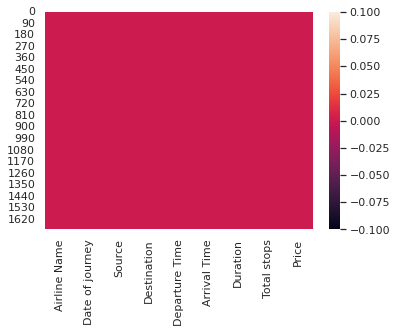

In [12]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [13]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

0

In [14]:
#number of null values in each column
df.isnull().sum()

Airline Name       0
Date of journey    0
Source             0
Destination        0
Departure Time     0
Arrival Time       0
Duration           0
Total stops        0
Price              0
dtype: int64

#### As we can see there are no NULL values in dataframe

### Histogram Plots :

In [15]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['Airline Name','Date of journey','Source','Destination','Total stops']].copy()

IndiGo       514
Air India    442
Vistara      418
Air Asia     143
Go First     131
SpiceJet      50
Name: Airline Name, dtype: int64


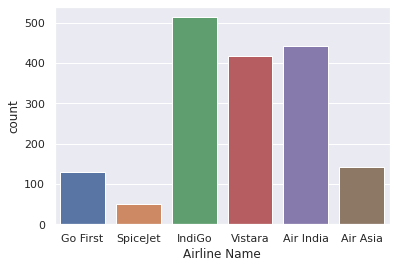

In [16]:
#Visualisation of Airline Name data
ax = sns.countplot(x='Airline Name',data=df_visualisation_nominal)
print(df_visualisation_nominal['Airline Name'].value_counts())

**As we can see most flights are of Indigo airlines between the source and destinations**

7 oct 2022     291
10 oct 2022    283
12 oct 2022    282
8 oct 2022     281
11 oct 2022    281
9 oct 2022     280
Name: Date of journey, dtype: int64


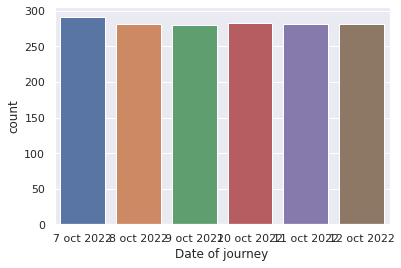

In [17]:
#Visualisation of Date of journey data
ax = sns.countplot(x='Date of journey',data=df_visualisation_nominal)
print(df_visualisation_nominal['Date of journey'].value_counts())

**As we can see that there are almost equal number of flights every day**

New Delhi    955
Bangalore    743
Name: Source, dtype: int64


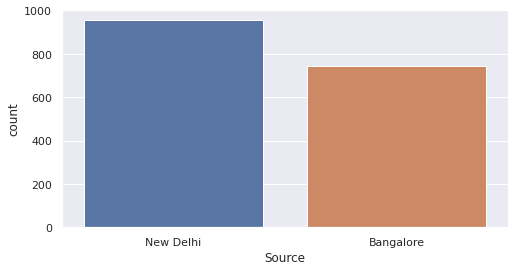

In [18]:
#Visualisation of Source data
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='Source',data=df_visualisation_nominal)
print(df_visualisation_nominal['Source'].value_counts())

**There are more flights from Delhi to Mumbai than Bangalore to Kolkata from 7 oct 2022 to 12 oct 2022**

Mumbai     955
Kolkata    743
Name: Destination, dtype: int64


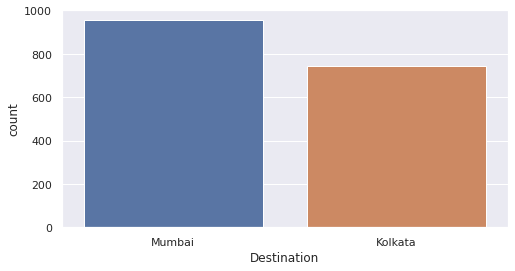

In [19]:
#Visualisation of Destination data
ax = sns.countplot(x='Destination',data=df_visualisation_nominal)
print(df_visualisation_nominal['Destination'].value_counts())

**There are more flights to Delhi to Mumbai than Bangalore to Kolkata from 7 oct 2022 to 12 oct 2022**

1 Stop       1158
Non Stop      398
2 Stop(s)     113
3 Stop(s)      29
Name: Total stops, dtype: int64


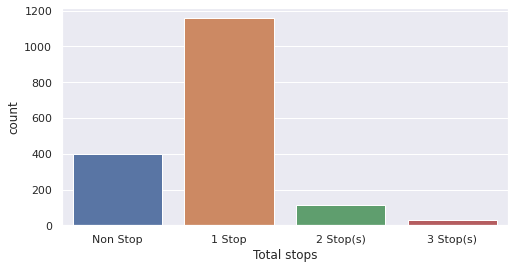

In [20]:
#Visualisation of Total stops data
ax = sns.countplot(x='Total stops',data=df_visualisation_nominal)
print(df_visualisation_nominal['Total stops'].value_counts())

**Most are 1 stop flights and least are 3 stop flights.**

### Density Plots:

In [21]:
#Making dataframe of Continous data
df_visualisation_continous = df[['Duration','Price']].copy()

<AxesSubplot:xlabel='Duration', ylabel='Density'>

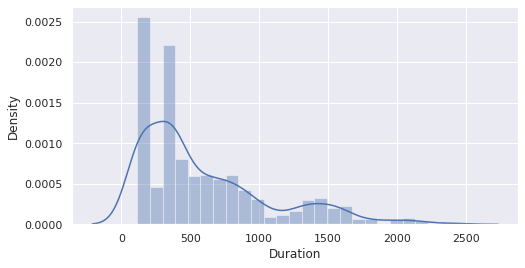

In [22]:
#Visualisation of Duration data
sns.distplot(df_visualisation_continous['Duration'])

**Above graph looks skewed right with mode around 250 minutes**

<AxesSubplot:xlabel='Price', ylabel='Density'>

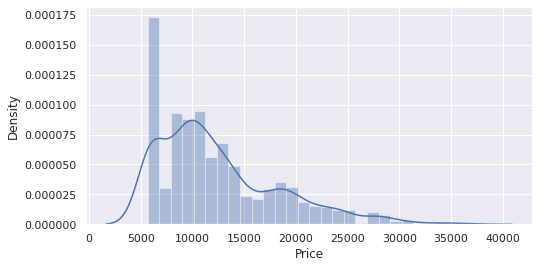

In [23]:
#Visualisation of Price data
sns.distplot(df_visualisation_continous['Price'])

**Above graph looks skewed right with mode around ₹5,000**

### Some important plots:

<AxesSubplot:xlabel='Date of journey', ylabel='Price'>

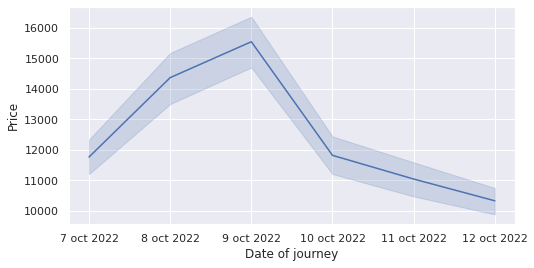

In [24]:
#Plotting Price vs Date of journey
sns.lineplot(x = df['Date of journey'], y = df['Price'], data = df)

**As we can see that more the difference between date of booking and date of journey, lesser will be the flight price**

<AxesSubplot:xlabel='Airline Name', ylabel='Price'>

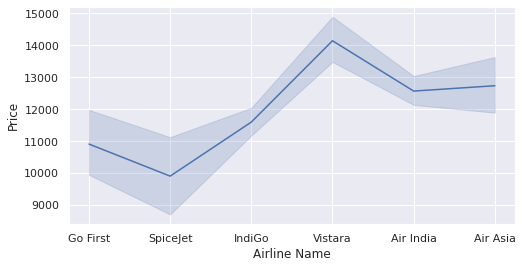

In [25]:
#Plotting Price vs Airline Name
sns.lineplot(x = df['Airline Name'], y = df['Price'], data = df)

**As we can see cheapest flight is Spicejet and most expensive is Vistara**

<AxesSubplot:xlabel='Departure Time', ylabel='Price'>

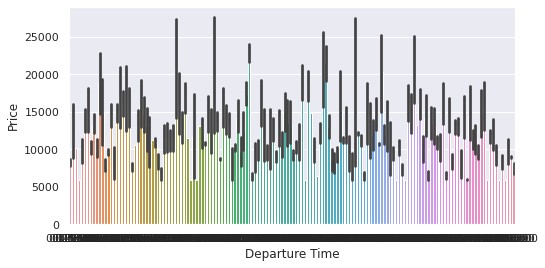

In [26]:
# Creating df1 with departure time in ascending order and then plotting it with price
df1 = df.sort_values(by=['Departure Time'], ascending=True)
sns.barplot(x = df1['Departure Time'], y = df1['Price'],data = df1)

In [27]:
df1

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
240,IndiGo,8 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,9393.0
543,IndiGo,10 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7805.0
370,IndiGo,9 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7805.0
860,IndiGo,12 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7913.0
701,IndiGo,11 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7913.0
...,...,...,...,...,...,...,...,...,...
813,IndiGo,12 oct 2022,New Delhi,Mumbai,23:35:00,01:40:00,125.0,Non Stop,5954.0
495,IndiGo,10 oct 2022,New Delhi,Mumbai,23:35:00,01:40:00,125.0,Non Stop,5954.0
1475,Air Asia,11 oct 2022,Bangalore,Kolkata,23:35:00,02:05:00,150.0,Non Stop,8839.0
968,Air Asia,7 oct 2022,Bangalore,Kolkata,23:35:00,02:05:00,150.0,Non Stop,8839.0


**As we can see that prices vary every hour throughout the day.**

#### Visualisation is completed

### Encoding of Both training and testing Dataframe(Converting String to numeric):

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [29]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
0,2.0,3.0,1.0,1.0,73.0,84.0,120.0,3.0,5950.0
1,2.0,3.0,1.0,1.0,89.0,100.0,125.0,3.0,5950.0
2,2.0,3.0,1.0,1.0,27.0,39.0,130.0,3.0,5950.0
3,4.0,3.0,1.0,1.0,30.0,41.0,135.0,3.0,5950.0
4,2.0,3.0,1.0,1.0,114.0,131.0,135.0,3.0,5950.0
...,...,...,...,...,...,...,...,...,...
1693,5.0,2.0,0.0,0.0,61.0,121.0,485.0,1.0,20074.0
1694,1.0,2.0,0.0,0.0,18.0,79.0,500.0,0.0,21124.0
1695,1.0,2.0,0.0,0.0,60.0,117.0,475.0,0.0,23224.0
1696,1.0,2.0,0.0,0.0,18.0,117.0,780.0,0.0,23224.0


### Correlations:

<AxesSubplot:>

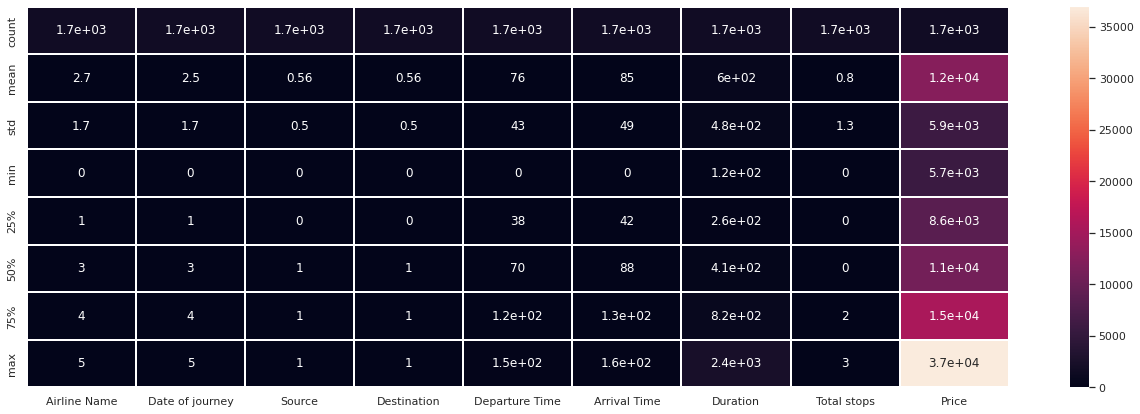

In [31]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [32]:
#Correlation matrix
df.corr()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
Airline Name,1.000000,0.044360,-0.107583,-0.107583,0.071250,-0.011711,-0.002427,0.142032,0.076250
Date of journey,0.044360,1.000000,-0.003354,-0.003354,0.014739,-0.008223,-0.006704,-0.017254,0.247551
Source,-0.107583,-0.003354,1.000000,1.000000,0.000713,0.032234,-0.214544,0.107323,-0.521240
Destination,-0.107583,-0.003354,1.000000,1.000000,0.000713,0.032234,-0.214544,0.107323,-0.521240
Departure Time,0.071250,0.014739,0.000713,0.000713,1.000000,-0.019676,-0.035341,0.099779,-0.096318
Arrival Time,-0.011711,-0.008223,0.032234,0.032234,-0.019676,1.000000,0.027992,-0.029555,0.137427
Duration,-0.002427,-0.006704,-0.214544,-0.214544,-0.035341,0.027992,1.000000,-0.401444,0.376862
Total stops,0.142032,-0.017254,0.107323,0.107323,0.099779,-0.029555,-0.401444,1.000000,-0.400225
Price,0.076250,0.247551,-0.521240,-0.521240,-0.096318,0.137427,0.376862,-0.400225,1.000000


<AxesSubplot:>

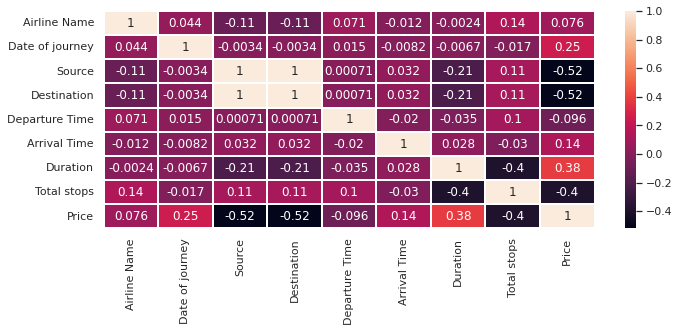

In [33]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (11,4))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

#### Here we can't see very high correlations as highest correlations present here are 1 and -0.52.

### Checking columns which appear to be highly correlated with target columns

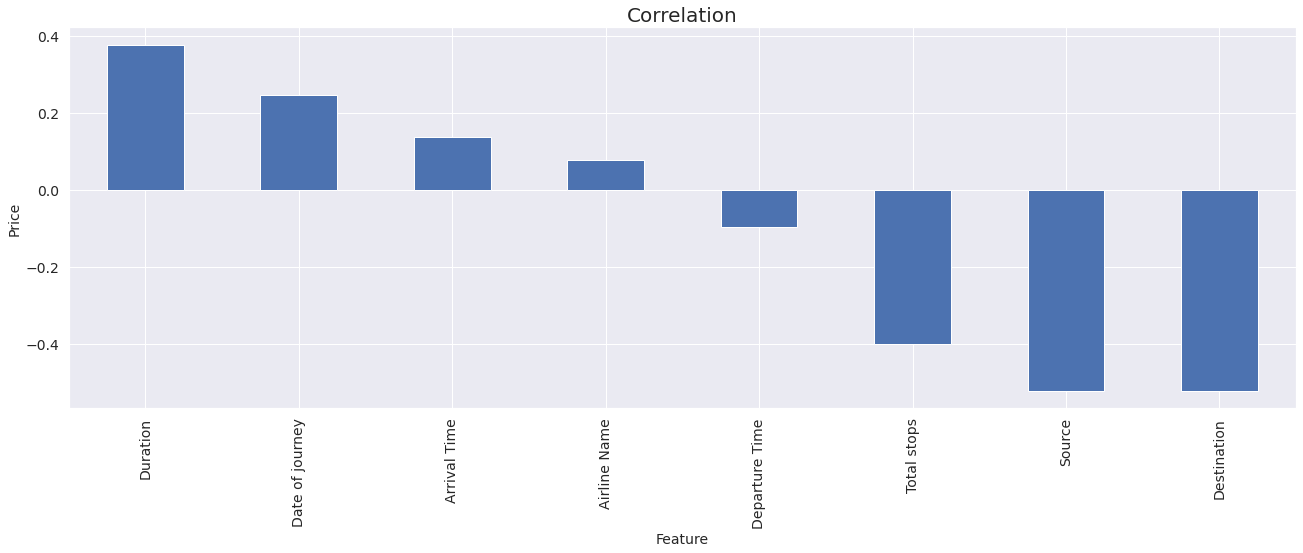

In [34]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

#### Here we can't see any high correlation with target column

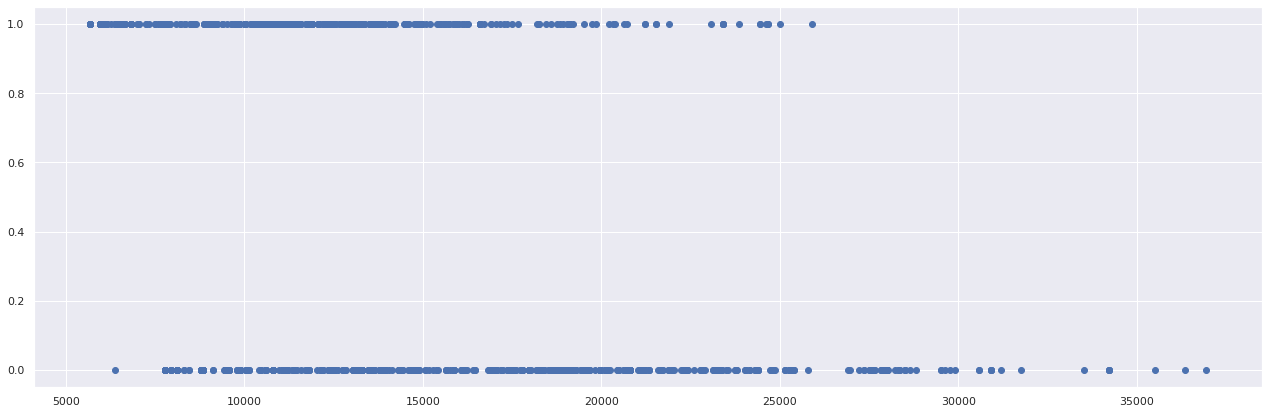

In [35]:
#Checking correlation between Price and Destination
plt.figure(figsize=(22,7))
plt.scatter(df['Price'],df['Destination'])
plt.show()

#### We can't see any high correlations here

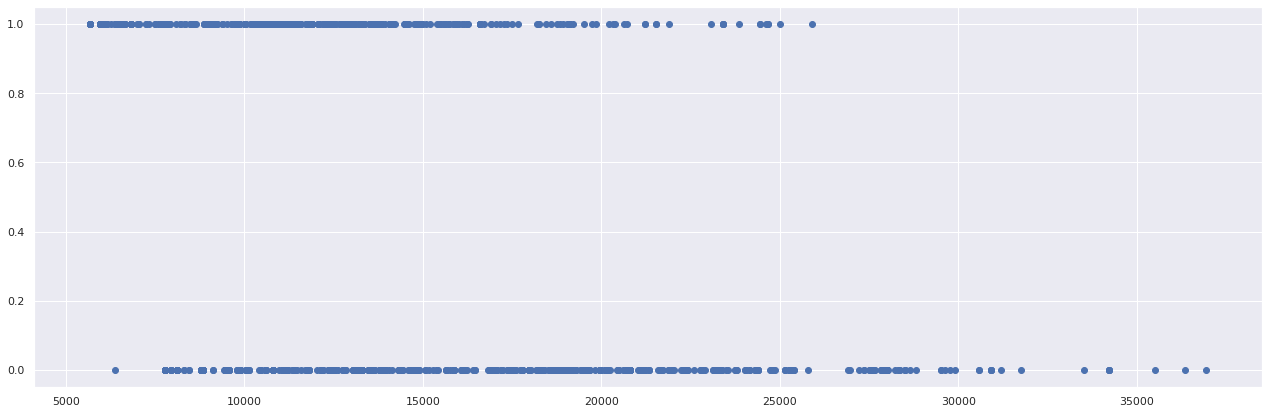

In [36]:
#Checking correlation between Price and Source
plt.figure(figsize=(22,7))
plt.scatter(df.Price,df.Source)
plt.show()

#### We can't see any high collinearity here

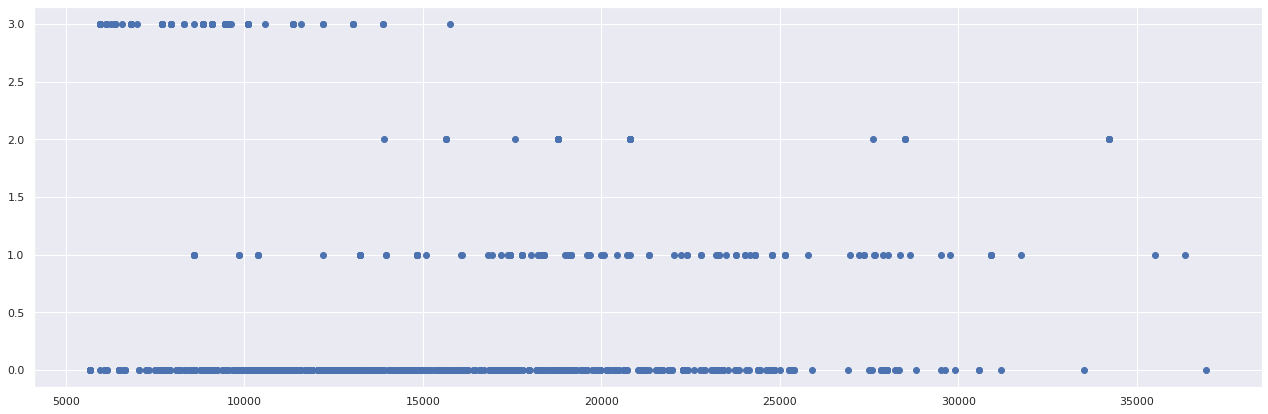

In [37]:
#Checking correlation between Price and Total Stops
plt.figure(figsize=(22,7))
plt.scatter(df.Price,df['Total stops'])
plt.show()

#### We can't see any high collinearity here

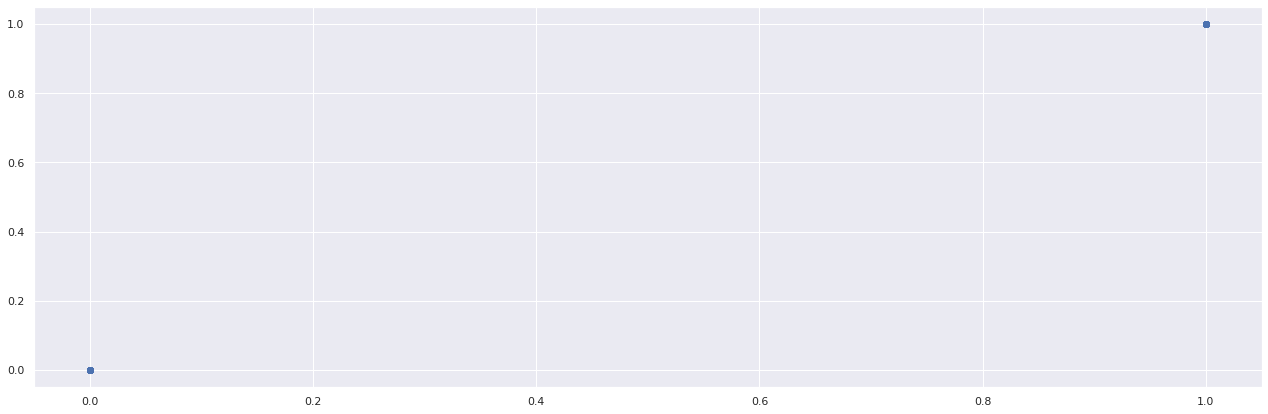

In [38]:
#Checking correlation between Source and Destination
plt.figure(figsize=(22,7))
plt.scatter(df.Source,df.Destination)
plt.show()

#### We can see high collinearity here but that is also because of limitation of data

### Checkin VIF for confirmation of above conclusion:

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X1 = df[['Price', 'Destination']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [41]:
print(vif_dF)

       feature       VIF
0        Price  1.391839
1  Destination  1.391839


### As we can see there is no high correlation(<10)

In [42]:
X2 = df[['Price','Source']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

In [43]:
print(vif_dF)

  feature       VIF
0   Price  1.391839
1  Source  1.391839


### As we can see here correlation is not high (<10)

In [44]:
X3 = df[['Price','Total stops']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X3.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]

In [45]:
print(vif_dF)

       feature       VIF
0        Price  1.131345
1  Total stops  1.131345


### As we can see here correlation is not high (<10)

In [46]:
X4 = df[['Source','Destination']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X4.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]

In [47]:
print(vif_dF)

       feature  VIF
0       Source  inf
1  Destination  inf


### As we can see here correlation is very high (>10)

In [48]:
#Dropping Source column
df.drop(['Source'], axis=1, inplace=True)

### Removing Skewness :

In [49]:
#Checking skewness
df.skew()

Airline Name       0.074181
Date of journey   -0.002342
Destination       -0.251897
Departure Time     0.079896
Arrival Time       0.004694
Duration           1.266091
Total stops        1.069084
Price              1.124543
dtype: float64

#### Acceptable skewness (-0.65,+0.65)

In [50]:
#Removing skewness from 'Duration'
from scipy.stats import boxcox
df['Duration'] = boxcox(df['Duration'])[0]

In [51]:
#Checking skewness
df.skew()

Airline Name       0.074181
Date of journey   -0.002342
Destination       -0.251897
Departure Time     0.079896
Arrival Time       0.004694
Duration           0.000475
Total stops        1.069084
Price              1.124543
dtype: float64

#### All continous columns (excluding target variable) are now in acceptable skew range 

### Removing outliers :

In [52]:
#Outlier check
df.dtypes

Airline Name       float64
Date of journey    float64
Destination        float64
Departure Time     float64
Arrival Time       float64
Duration           float64
Total stops        float64
Price              float64
dtype: object

Airline Name          AxesSubplot(0.125,0.657941;0.227941x0.222059)
Date of journey    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Destination        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Departure Time        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Arrival Time       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Duration           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Total stops              AxesSubplot(0.125,0.125;0.227941x0.222059)
Price                 AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

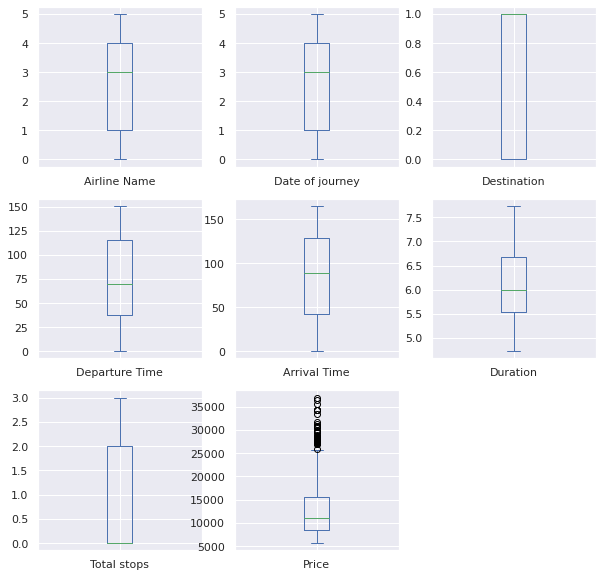

In [53]:
#Checking only for continous data types
df.plot.box(layout =(3,3),subplots=True,figsize=(10,10))

### There looks like outliers in some columns so now we check with z-score:

In [54]:
#Outlier removal using z-score
df.shape

(1698, 8)

In [55]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1320, 1321, 1322,
        1323, 1324, 1325, 1326, 1327]),
 array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]))

#### We can see that outliers are only in target variable and hence no need to remove them

## Separating the columns into features and target for 'Price' target variable:

In [56]:
feature = df.drop("Price",axis=1)
target = df["Price"]

In [57]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [58]:
import warnings
warnings.filterwarnings('ignore')

### Model 1:

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [60]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.4999706131691889
At random state 0 the testing accuracy is : 0.5476042938881196


At random state 1 the training accuracy is : 0.5144345576355316
At random state 1 the testing accuracy is : 0.49116938151234435


At random state 2 the training accuracy is : 0.5193051741994703
At random state 2 the testing accuracy is : 0.4796140830696173


At random state 3 the training accuracy is : 0.5236293928202564
At random state 3 the testing accuracy is : 0.4548506528086521


At random state 4 the training accuracy is : 0.5061153271322764
At random state 4 the testing accuracy is : 0.524773298957784


At random state 5 the training accuracy is : 0.5147931304495279
At random state 5 the testing accuracy is : 0.491763099191842


At random state 6 the training accuracy is : 0.5112606024082165
At random state 6 the testing accuracy is : 0.5041808327830715


At random state 7 the training accuracy is : 0.5052200130141907
At random state 7 the testing accu

In [61]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 9)

In [62]:
lr.fit(features_train,target_train)

LinearRegression()

In [63]:
pred_test = lr.predict(features_test)

In [64]:
print(r2_score(target_test,pred_test))

0.5056275585665695


### Cross Validation of model:

In [65]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [66]:
for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is -0.2727951750529799 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665695


At cross fold 3 the cv score is 0.16394121387635865 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665695


At cross fold 4 the cv score is 0.10744496808151496 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665695


At cross fold 5 the cv score is -0.0627489591106342 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665695


At cross fold 6 the cv score is 0.04923532153402482 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665695


At cross fold 7 the cv score is -0.05847957887325613 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665695


At cross fold 8 the cv score is 0

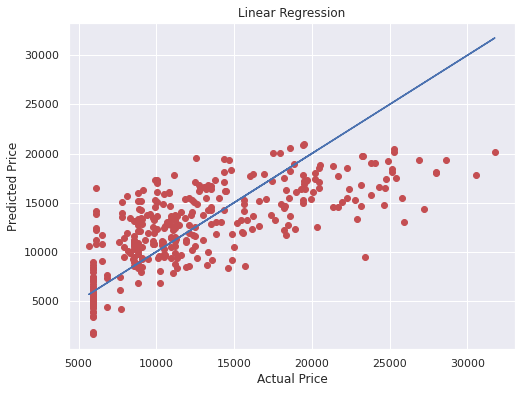

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.show()

We can see almost all points lie near best fit curve but still there is lot of error present

### Regularization using Lasso:

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [69]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [70]:
ls = Lasso(alpha = 10, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.5054580891734664

In [71]:
cv_score = cross_val_score(ls,feature,target,cv=6)
cv_mean =cv_score.mean()
abs(cv_mean)

0.05002273821678308

### Trying other models:

In [72]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",r2_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",r2_score(target_test,model_1_pred_test))
    
    Train_accuracy = r2_score(target_train,model_1_pred_train)
    Test_accuracy = r2_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature,target,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")

### Model 2:

In [73]:
from sklearn.svm import SVR
model_selection(SVR(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  -0.06462320433380886
Accuracy for the testing model :  -0.0950997703540779
At cross fold 2 the cv score is -0.9216749933443029 and accuracy score for training is -0.06462320433380886 and accuracy score for testing is -0.0950997703540779


At cross fold 3 the cv score is -0.39744792474129126 and accuracy score for training is -0.06462320433380886 and accuracy score for testing is -0.0950997703540779


At cross fold 4 the cv score is -0.3991756151151322 and accuracy score for training is -0.06462320433380886 and accuracy score for testing is -0.0950997703540779


At cross fold 5 the cv score is -0.6192897021681978 and accuracy score for training is -0.06462320433380886 and accuracy score for testing is -0.0950997703540779


At cross fold 6 the cv score is -0.5440963254357584 and accuracy score for training is -0.06462320433380886 and accuracy score for testing is -0.0950997703540779


At cross fold 7 the cv score is -0.7897177990957189 and accuracy scor

### Model 3:

In [74]:
from sklearn.ensemble import RandomForestRegressor
model_selection(RandomForestRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9741278615603357
Accuracy for the testing model :  0.7942563514092913
At cross fold 2 the cv score is -0.6672666487812541 and accuracy score for training is 0.9741278615603357 and accuracy score for testing is 0.7942563514092913


At cross fold 3 the cv score is 0.3293461578295141 and accuracy score for training is 0.9741278615603357 and accuracy score for testing is 0.7942563514092913


At cross fold 4 the cv score is -0.02051038105382383 and accuracy score for training is 0.9741278615603357 and accuracy score for testing is 0.7942563514092913


At cross fold 5 the cv score is 0.168089015057804 and accuracy score for training is 0.9741278615603357 and accuracy score for testing is 0.7942563514092913


At cross fold 6 the cv score is 0.25587743453819695 and accuracy score for training is 0.9741278615603357 and accuracy score for testing is 0.7942563514092913


At cross fold 7 the cv score is 0.3802765064428781 and accuracy score for training is 0.97

### Model 4:

In [75]:
from sklearn.tree import DecisionTreeRegressor
model_selection(DecisionTreeRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9998320583184103
Accuracy for the testing model :  0.6399770563950407
At cross fold 2 the cv score is -1.0505756461889422 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6399770563950407


At cross fold 3 the cv score is 0.08709866558826133 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6399770563950407


At cross fold 4 the cv score is -0.2937971804352232 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6399770563950407


At cross fold 5 the cv score is -0.0758889489894022 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6399770563950407


At cross fold 6 the cv score is -0.05070199044660236 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6399770563950407


At cross fold 7 the cv score is 0.17879714305594124 and accuracy score for training is 

### Conclusion: Here RandomForestRegressor() gives best accuracy hence taking it as main model

#### Below we have tested mean squared error, Root mean squared error and Mean Absolute error method also:

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [77]:
# Mean Squared Error Method
x = RandomForestRegressor()
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 992229.5191224603
At random state 0 the testing accuracy is : 5058535.029021392


At random state 1 the training accuracy is : 921006.0114341493
At random state 1 the testing accuracy is : 7289597.049038809


At random state 2 the training accuracy is : 957140.7612476428
At random state 2 the testing accuracy is : 5595629.511338454


At random state 3 the training accuracy is : 914182.5411096071
At random state 3 the testing accuracy is : 7938484.606156677


At random state 4 the training accuracy is : 957737.358408634
At random state 4 the testing accuracy is : 5712253.412228574


At random state 5 the training accuracy is : 846441.92357374
At random state 5 the testing accuracy is : 7930774.233215464


At random state 6 the training accuracy is : 889120.9443671659
At random state 6 the testing accuracy is : 6014781.122977316


At random state 7 the training accuracy is : 966563.5069924089
At random state 7 the testing accuracy is : 5685500

In [78]:
# Root Mean Squared Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train,squared=False)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test,squared=False)))
    print("\n")

At random state 0 the training accuracy is : 986.8367617628319
At random state 0 the testing accuracy is : 2284.549520543702


At random state 1 the training accuracy is : 982.81166788932
At random state 1 the testing accuracy is : 2668.061975584535


At random state 2 the training accuracy is : 971.1689109758421
At random state 2 the testing accuracy is : 2372.1473073056777


At random state 3 the training accuracy is : 960.2023082363542
At random state 3 the testing accuracy is : 2844.624528436737


At random state 4 the training accuracy is : 968.9318712282088
At random state 4 the testing accuracy is : 2439.31250526295


At random state 5 the training accuracy is : 923.5441583281239
At random state 5 the testing accuracy is : 2825.730461784174


At random state 6 the training accuracy is : 949.8408176586081
At random state 6 the testing accuracy is : 2434.600226829488


At random state 7 the training accuracy is : 1005.2366199068897
At random state 7 the testing accuracy is : 2405.

In [79]:
# Mean Absolute Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_absolute_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_absolute_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 611.5013717476681
At random state 0 the testing accuracy is : 1411.6192990196078


At random state 1 the training accuracy is : 592.7125962199314
At random state 1 the testing accuracy is : 1666.2149019607846


At random state 2 the training accuracy is : 592.5859107581177
At random state 2 the testing accuracy is : 1581.8372460784315


At random state 3 the training accuracy is : 595.1322247703205
At random state 3 the testing accuracy is : 1767.6454239495802


At random state 4 the training accuracy is : 605.5302903780068
At random state 4 the testing accuracy is : 1510.773973039216


At random state 5 the training accuracy is : 586.8983840206186
At random state 5 the testing accuracy is : 1734.8933632352937


At random state 6 the training accuracy is : 595.9355196367206
At random state 6 the testing accuracy is : 1586.6026083333336


At random state 7 the training accuracy is : 609.4874795041728
At random state 7 the testing accuracy is 

#### Conclusion of 4 metrics method : As we can see we got best accuracy results in r2_score among (r2_score, mse, rms,mae)

### Ensemble technique:

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#using 4 parameters
parameters = {'criterion':['mse','mae'], 'max_features': ["auto","sqrt","log2"], 'min_samples_split' : [2,5,10], 'min_samples_leaf' : [1,2,4]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:
rf = RandomForestRegressor(criterion = "mae", max_features = "auto", min_samples_leaf = 1, min_samples_split = 2)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', abs(rfs)*100)

rfscore = cross_val_score(ls,feature,target,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

R2 score:  80.7249456235667
Cross Validation score:  5.002273821678308


### Conclusion : We got r2_score as 80.72% for 'Price' prediction